# First Simple Categorizing Algorithms
--mknipfer, LHCMLHACKATHON

- some first atttempts
- random forest seems to be quite good

ToDo:
- labels for plots
- other simple models

In [1]:
import pandas as pd
import numpy as np
from root_pandas import read_root

from tqdm import tqdm

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB # not good
from sklearn.naive_bayes import GaussianNB # also not good, but better
from sklearn.naive_bayes import ComplementNB # not good
from sklearn.naive_bayes import BernoulliNB # always 1
from scipy import interp
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

Welcome to JupyROOT 6.18/02


In [2]:
data_path = "data/Higgs_data.root"
df_signalTree = read_root(data_path, "sig_tree")
df_backgroundTree = read_root(data_path, "bkg_tree")

raw_cols = ['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag',
       'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', 'jet3_pt', 'jet3_eta',
       'jet3_phi', 'jet3_btag', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']
man_cols = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [3]:
# add flag data
# 1: signal
# 2: no signal
df_signalTree['y'] = 1
df_backgroundTree['y'] = 0
df_all = pd.concat([df_signalTree, df_backgroundTree])

f1=0.641 auc=0.725 ap=0.694


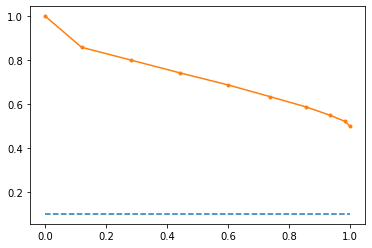

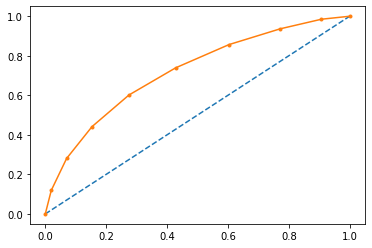

In [4]:
# KNN
y = df_all['y']
relevant_cols = man_cols
X = df_all[relevant_cols]

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state = 2)
# fit a model
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
fpr, tpr, thresholds = roc_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc_value = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))
# plot no skill
pyplot.plot([0, 1], [0.1, 0.1], linestyle='--')

pyplot.plot(recall, precision, marker='.')
pyplot.show()

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.647 auc=0.591 ap=0.591


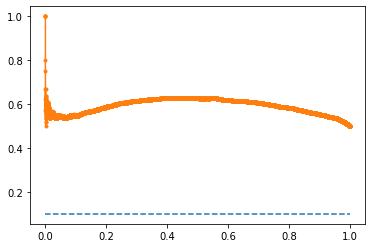

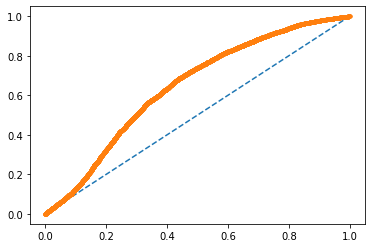

In [5]:
# Logistic Regression

y = df_all['y']
relevant_cols = man_cols
X = df_all[relevant_cols]

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state = 2)
# fit a model
model = LogisticRegression(random_state=0, solver='saga', penalty = 'l2', multi_class='ovr')
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
fpr, tpr, thresholds = roc_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc_value = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))
# plot no skill
pyplot.plot([0, 1], [0.1, 0.1], linestyle='--')

pyplot.plot(recall, precision, marker='.')
pyplot.show()

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.653 auc=0.636 ap=0.637


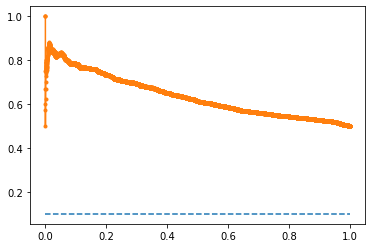

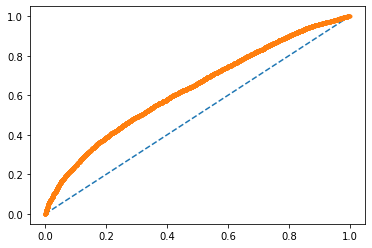

In [6]:
# Naive Bayes

y = df_all['y']
relevant_cols = man_cols
X = df_all[relevant_cols]

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.7, random_state = 2)
# fit a model
model = GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
fpr, tpr, thresholds = roc_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc_value = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))
# plot no skill
pyplot.plot([0, 1], [0.1, 0.1], linestyle='--')

pyplot.plot(recall, precision, marker='.')
pyplot.show()

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot

pyplot.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Average number of nodes 4983
Average maximum depth 29


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s f

{'recall': 0.6803333333333333, 'precision': 0.6963493688161038, 'roc': 0.7655265}
Recall Baseline: 1.0 Test: 0.68 Train: 1.0
Precision Baseline: 0.5 Test: 0.7 Train: 1.0
Roc Baseline: 0.5 Test: 0.77 Train: 1.0


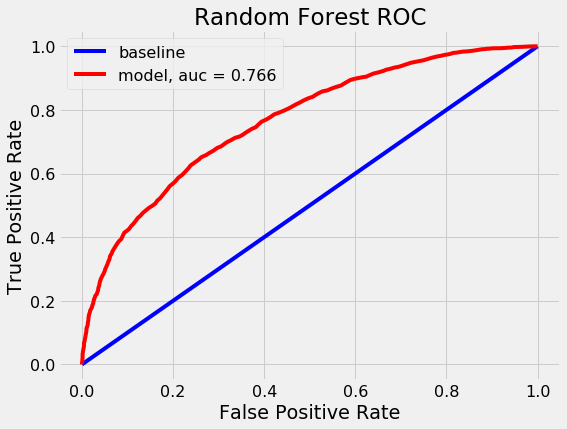

Normalized confusion matrix
[[0.70333333 0.29666667]
 [0.31966667 0.68033333]]


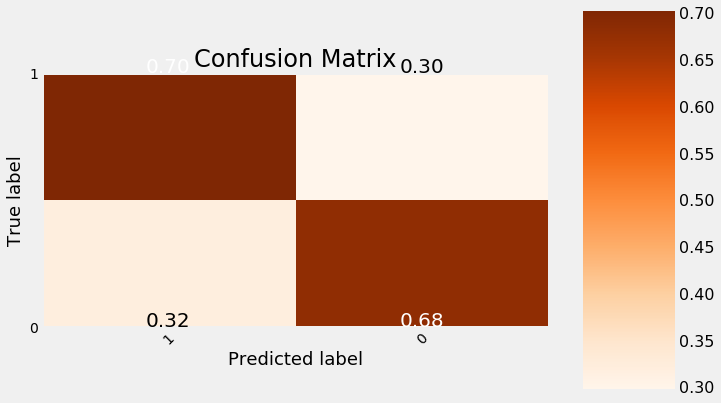

In [11]:
K